In [1]:
import os
import boto3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
s3 = boto3.client("s3")

filename = "housing-data.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/housing-data.csv", filename)
df = pd.read_csv(filename)

In [3]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


array([[<AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'bdrms'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

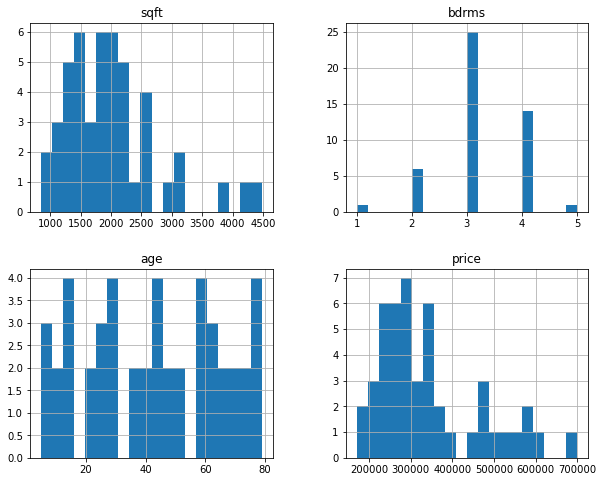

In [5]:
df.hist(bins=20,figsize=(10,8))

In [6]:
X = df[['sqft','bdrms','age']]
y = df['price']

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.5),'mean_squared_error')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [9]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
37/37 [==============================] - 0s 9ms/step - loss: 135936090997.6216
Epoch 2/50
37/37 [==============================] - 0s 190us/step - loss: 134590135655.7838
Epoch 3/50
37/37 [==============================] - 0s 147us/step - loss: 132970104112.4324
Epoch 4/50
37/37 [==============================] - 0s 158us/step - loss: 131347295481.0811
Epoch 5/50
37/37 [==============================] - 0s 197us/step - loss: 129799990078.2703
Epoch 6/50
37/37 [==============================] - 0s 160us/step - loss: 128136229417.5135
Epoch 7/50
37/37 [==============================] - 0s 153us/step - loss: 126562831830.4865
Epoch 8/50
37/37 [==============================] - 0s 276us/step - loss: 125066847979.2432
Epoch 9/50
37/37 [==============================] - 0s 181us/step - loss: 123497720638.2703
Epoch 10/50
37/37 [==============================] - 0s 120us/step - loss: 121986921222.9189
Epoch 11/50
37/37 [==============================] - 0s 131us/step - loss: 120521

In [10]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [11]:
print("The MSE on Train set is:\t{:0.3f}".format(mse(y_train_pred,y_train)))
print("The MSE on Test set is:\t{:0.3f}".format(mse(y_test_pred,y_test)))

The MSE on Train set is:	71695128422.044
The MSE on Test set is:	60105931872.796


In [12]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['sqft_ss'] = ss.fit_transform(df[['sqft']])
df['bdrms_ss'] = ss.fit_transform(df[['bdrms']])
df['age_ss'] = ss.fit_transform(df[['age']])

df['price100K'] = df['price']/1e5
df.describe().round(2)

,sqft,bdrms,age,price,sqft_ss,bdrms_ss,age_ss,price100K
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,-0.00,0.00,0.00,3.40
std,794.70,0.76,22.87,125039.90,1.01,1.01,1.01,1.25
min,852.00,1.00,5.00,169900.00,-1.46,-2.88,-1.67,1.70
25%,1432.00,3.00,24.50,249900.00,-0.72,-0.23,-0.81,2.50
50%,1888.00,3.00,44.00,299900.00,-0.14,-0.23,0.06,3.00
75%,2269.00,4.00,61.50,384450.00,0.34,1.10,0.83,3.84
max,4478.00,5.00,79.00,699900.00,3.15,2.43,1.60,7.00


In [14]:
df

,sqft,bdrms,age,price,sqft_ss,bdrms_ss,age_ss,price100K
0,2104,3,70,399900,0.131415,-0.226093,1.204453,3.99900
1,1600,3,28,329900,-0.509641,-0.226093,-0.651589,3.29900
2,2400,3,44,369000,0.507909,-0.226093,0.055474,3.69000
3,1416,2,49,232000,-0.743677,-1.554392,0.276432,2.32000
4,3000,4,75,539900,1.271071,1.102205,1.425410,5.39900
5,1985,4,61,299900,-0.019945,1.102205,0.806730,2.99900
6,1534,3,12,314900,-0.593589,-0.226093,-1.358653,3.14900
7,1427,3,57,198999,-0.729686,-0.226093,0.629964,1.98999
8,1380,3,14,212000,-0.789467,-0.226093,-1.270270,2.12000
9,1494,3,15,242500,-0.644466,-0.226093,-1.226078,2.42500


In [16]:
X = df[['sqft_ss','bdrms_ss','age_ss']]
y = df['price100K']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [28]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8),'mean_squared_error')

In [29]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [30]:
print("The MSE on Train set is:\t{:0.3f}".format(mse(y_train_pred,y_train)))
print("The MSE on Test set is:\t{:0.3f}".format(mse(y_test_pred,y_test)))

The MSE on Train set is:	17.484
The MSE on Test set is:	28.851


In [31]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.1),'mean_squared_error')

In [32]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [33]:
print("The MSE on Train set is:\t{:0.3f}".format(mse(y_train_pred,y_train)))
print("The MSE on Test set is:\t{:0.3f}".format(mse(y_test_pred,y_test)))

The MSE on Train set is:	13.131
The MSE on Test set is:	19.617


In [34]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(SGD(lr=0.01),'mean_squared_error')

In [35]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [36]:
print("The MSE on Train set is:\t{:0.3f}".format(mse(y_train_pred,y_train)))
print("The MSE on Test set is:\t{:0.3f}".format(mse(y_test_pred,y_test)))

The MSE on Train set is:	12.382
The MSE on Test set is:	12.602


In [37]:
print("R2 on Train set is:\t{:0.3f}".format(r2_score(y_train_pred,y_train)))
print("R2 on Test set is:\t{:0.3f}".format(r2_score(y_test_pred,y_test)))

R2 on Train set is:	-12.676
R2 on Test set is:	-9.877
